In [97]:
import sys
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from rusenttokenize import ru_sent_tokenize
import string
import pymorphy2
from sklearn.feature_extraction.text import TfidfVectorizer

In [98]:
document = """Часть первая

Маленькие дети!
Ни за что на свете
Не ходите в Африку,
В Африку гулять!
В Африке акулы,
В Африке гориллы,
В Африке большие
Злые крокодилы
Будут вас кусать,
Бить и обижать,-
Не ходите, дети,
В Африку гулять.

В Африке разбойник,
В Африке злодей,
В Африке ужасный
Бар-ма-лей!

Он бегает по Африке
И кушает детей —
Гадкий, нехороший, жадный Бармалей!

И папочка, и мамочка
Под деревом сидят,
И папочка, и мамочка
Детям говорят:

"Африка ужасна,
Да-да-да!
Африка опасна,
Да-да-да!
Не ходите в Африку,
Дети, никогда!"

Но папочка и мамочка уснули вечерком,
А Танечка и Ванечка — в Африку бегом, —
В Африку!
В Африку!

Вдоль по Африке гуляют,
Фиги-финики срывают,-
Ну и Африка!
Вот так Африка!

Оседлали Носорога,
Покаталися немного,-
Ну и Африка!
Вот так Африка!

Со слонами на ходу
Поиграли в чехарду,-
Ну и Африка!
Вот так Африка!

Выходила к ним горилла,
Им горилла говорила,
Говорила им горилла,
Приговаривала:

"Вон акула Каракула
Распахнула злую пасть.
Вы к акуле Каракуле
Не хотите ли попасть
Прямо в па-асть?"

"Нам акула Каракула
Нипочём, нипочём,
Мы акулу Каракулу
Кирпичом, кирпичом,
Мы акулу Каракулу
Кулаком, кулаком!
Мы акулу Каракулу
Каблуком, каблуком!"

Испугалася акула
И со страху утонула,-
Поделом тебе, акула, поделом!

Но вот по болотам огромный
Идёт и ревёт бегемот,
Он идёт, он идёт по болотам
И громко и грозно ревёт.

А Таня и Ваня хохочут,
Бегемотово брюхо щекочут:
"Ну и брюхо,
Что за брюхо —
Замечательное!"

Не стерпел такой обиды
Бегемот,
Убежал за пирамиды
И ревёт,
Бармалея, Бармалея
Громким голосом
Зовёт:

"Бармалей, Бармалей, Бармалей!
Выходи, Бармалей, поскорей!
Этих гадких детей, Бармалей,
Не жалей, Бармалей, не жалей!"

Часть вторая

Таня-Ваня задрожали —
Бармалея увидали.
Он по Африке идёт,
На всю Африку поёт:

"Я кровожадный,
Я беспощадный,
Я злой разбойник Бармалей!
И мне не надо
Ни мармелада,
Ни шоколада,
А только маленьких
(Да, очень маленьких!)
Детей!"

Он страшными глазами сверкает,
Он страшными зубами стучит,
Он страшный костёр зажигает,
Он страшное слово кричит:
"Карабас! Карабас!
Пообедаю сейчас!"

Дети плачут и рыдают,
Бармалея умоляют:

"Милый, милый Бармалей,
Смилуйся над нами,
Отпусти нас поскорей
К нашей милой маме!

Мы от мамы убегать
Никогда не будем
И по Африке гулять
Навсегда забудем!
Милый, милый людоед,
Смилуйся над нами,
Мы дадим тебе конфет,
Чаю с сухарями!"

Но ответил людоед:
"Не-е-ет!!!"

И сказала Таня Ване:
"Посмотри, в аэроплане
Кто-то по небу летит.
Это доктор, это доктор,
Добрый доктор Айболит!"

Добрый доктор Айболит
К Тане-Ване подбегает,
Таню-Ваню обнимает
И злодею Бармалею,
Улыбаясь, говорит:

"Ну, пожалуйста, мой милый,
Мой любезный Бармалей,
Развяжите, отпустите
Этих маленьких детей!"

Но злодей Айболита хватает
И в костёр Айболита бросает.
И горит, и кричит Айболит:
"Ай, болит! Ай, болит! Ай, болит!"

А бедные дети под пальмой лежат,
На Бармалея глядят
И плачут, и плачут, и плачут!

Часть третья

Но вот из-за Нила
Горилла идёт,
Горилла идёт,
Крокодила ведёт!

Добрый доктор Айболит
Крокодилу говорит:
"Ну, пожалуйста, скорее
Проглотите Бармалея,
Чтобы жадный Бармалей
Не хватал бы,
Не глотал бы
Этих маленьких детей!"

Повернулся,
Улыбнулся,
Засмеялся
Крокодил,
И злодея
Бармалея,
Словно муху,
Проглотил!

Рада, рада, рада, рада детвора,
Заплясала, заиграла у костра:
"Ты нас,
Ты нас
От смерти спас,
Ты нас освободил.
Ты в добрый час
Увидел нас,
о добрый
Крокодил!"

Но в животе у Крокодила
Темно и тесно и уныло,
И в животе у Крокодила
Рыдает, плачет Бармалей:
"О, я буду добрей!
Полюблю я детей!
Не губите меня!
Пощадите меня!
О, я буду, я буду, я буду добрей!"

Пожалели дети Бармалея,
Крокодилу дети говорят:
"Если он и вправду сделался добрее,
Отпусти его, пожалуйста, назад!
Мы возьмём с собою Бармалея,
Увезём в далёкий Ленинград!"

Крокодил головою кивает,
Широкую пасть разевает, —
И оттуда, улыбаясь, вылетает Бармалей,
А лицо у Бармалея и добрее и милей:
"Как я рад, как я рад,
Что поеду в Ленинград!"

Пляшет, пляшет Бармалей, Бармалей:
"Буду, буду я добрей, да, добрей!
Напеку я для детей, для детей
Пирогов и кренделей, кренделей!
По базарам, по базарам буду, буду я гулять!
Буду даром, буду даром пироги я раздавать,
Кренделями, калачами ребятишек угощать.

А для Ванечки
И для Танечки
Будут, будут у меня
Мятны прянички!
Пряник мятный,
Ароматный,
Удивительно приятный,
Приходите, получите,
Ни копейки не платите,
Потому что Бармалей
Любит маленьких детей,
Любит, любит, любит, любит,
Любит маленьких детей!"""

In [99]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def show_wordcloud_by_freq_dict(freq_dict):
    
    wordcloud = WordCloud()
    wordcloud.generate_from_frequencies(frequencies=freq_dict)
    
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [100]:
from collections import defaultdict as dd
from operator import itemgetter

morph_analyzer = pymorphy2.MorphAnalyzer()
russian_stopwords = stopwords.words('russian')
# print(russian_stopwords)

def preprocess_tokenize(text):
    
    text_preprocessed_tokenized = []
        
    for sentence in ru_sent_tokenize(text):
        
        clean_words = [word.strip(string.punctuation) for word in word_tokenize(sentence)]

        clean_words = [word for word in clean_words if word]
        
        clean_words = [word.lower() for word in clean_words if word]
        clean_words = [word for word in clean_words if word not in russian_stopwords]
        
        clean_lemmas = [morph_analyzer.parse(word)[0].normal_form for word in clean_words]
        
        text_preprocessed_tokenized.extend(clean_lemmas)

    return text_preprocessed_tokenized

бармалей	0.057203389830508496
африка	0.055084745762711884
ребёнок	0.03813559322033899
быть	0.02966101694915255
акула	0.019067796610169493
крокодил	0.019067796610169493
маленький	0.01483050847457627
добрый	0.01483050847457627
горилла	0.01271186440677966
—	0.01271186440677966


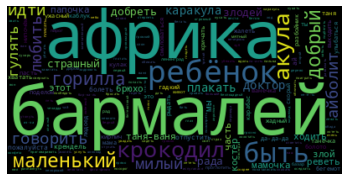

In [101]:
# 10 самых частотных слов в тексте
text_words_frequencies = dd(int)
document_tokenized = preprocess_tokenize(document)
for word in document_tokenized:
    text_words_frequencies[word] += 1 / len(document_tokenized)

sorted_frequency_table = sorted(text_words_frequencies.items(), 
                                key=itemgetter(1), reverse=True)    

for word, freq in sorted_frequency_table[:10]:
    print('\t'.join((word, str(freq))))

show_wordcloud_by_freq_dict(text_words_frequencies)
# print(document)

[('африку', 0.4242640687119285), ('африке', 0.4242640687119285), ('ходите', 0.282842712474619), ('не', 0.282842712474619), ('дети', 0.282842712474619), ('гулять', 0.282842712474619), ('что', 0.1414213562373095), ('свете', 0.1414213562373095), ('обижать', 0.1414213562373095), ('ни', 0.1414213562373095), ('на', 0.1414213562373095), ('маленькие', 0.1414213562373095), ('кусать', 0.1414213562373095), ('крокодилы', 0.1414213562373095), ('злые', 0.1414213562373095), ('за', 0.1414213562373095), ('гориллы', 0.1414213562373095), ('вас', 0.1414213562373095), ('будут', 0.1414213562373095), ('большие', 0.1414213562373095), ('бить', 0.1414213562373095), ('акулы', 0.1414213562373095)]


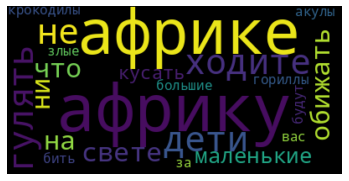

In [102]:
# TF-IDF для глагольных форм в первом фрагменте текста

doc_extract = ["Маленькие дети! Ни за что на свете Не ходите в Африку, В Африку гулять! В Африке акулы, В Африке гориллы, В Африке большие Злые крокодилы Будут вас кусать, Бить и обижать, - Не ходите, дети, В Африку гулять."]

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit_transform(doc_extract)
feature_names = tfidf_vectorizer.get_feature_names_out()


X = tfidf_vectorizer.transform(doc_extract)

tfidf_scores = [(feature_names[col], X[0, col]) for col in X.nonzero()[1]]
freq_list = [(word, freq) for word, freq in sorted(tfidf_scores, 
                                                   key=itemgetter(1), 
                                                   reverse=True)]

print(freq_list)
show_wordcloud_by_freq_dict(dict(freq_list))
# print(doc_extract)

In [103]:
# Найти более тематичное слово для фрагмента текста
extract = ["Но папочка и мамочка уснули вечерком, А Танечка и Ванечка — в Африку бегом, — В Африку! В Африку!"]


tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit_transform(extract)
feature_names = tfidf_vectorizer.get_feature_names_out()


X = tfidf_vectorizer.transform(doc_extract)

tfidf_scores = [(feature_names[col], X[0, col]) for col in X.nonzero()[1]]
freq_list = [(word, freq) for word, freq in sorted(tfidf_scores, 
                                                   key=itemgetter(1), 
                                                   reverse=True)]

print(freq_list)
# show_wordcloud_by_freq_dict(dict(freq_list))

[('африку', 1.0)]


In [104]:
from ufal.udpipe import Model, Pipeline
from nltk import DependencyGraph, Tree 

In [105]:
# сохраняем в переменную UDPIPE_MODEL_FN модель, которую загружаем из репозитория UD 
UDPIPE_MODEL_FN = "model_ru.udpipe"
!wget -O {UDPIPE_MODEL_FN} 'https://github.com/jwijffels/udpipe.models.ud.2.0/blob/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe?raw=true'

--2022-02-12 15:13:35--  https://github.com/jwijffels/udpipe.models.ud.2.0/blob/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe?raw=true
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/jwijffels/udpipe.models.ud.2.0/raw/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe [following]
--2022-02-12 15:13:36--  https://github.com/jwijffels/udpipe.models.ud.2.0/raw/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jwijffels/udpipe.models.ud.2.0/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe [following]
--2022-02-12 15:13:36--  https://raw.githubusercontent.com/jwijffels/udpipe.models.ud.2.0/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe
Re

In [106]:
model = Model.load(UDPIPE_MODEL_FN) # загружаем модель, сохраняем в переменную model

In [107]:
def conllu_to_list(parser_result): 
 
    sents = []
    for sent in parser_result.split('\n\n'):

        sent = '\n'.join([line for line in sent.split('\n') if not line.startswith('#')])
        
        sent = sent.replace('\troot\t', '\tROOT\t')
        sents.append(sent)
    return sents

In [108]:
sent = "В Африке акулы, В Африке гориллы, В Африке большие Злые крокодилы"
pipeline = Pipeline(model, 'generic_tokenizer', '','','')
parsed = pipeline.process(sent) 
print(parsed) 

# newdoc
# newpar
# sent_id = 1
# text = В Африке акулы, В Африке гориллы, В Африке большие Злые крокодилы
1	В	В	ADP	IN	_	2	case	_	_
2	Африке	АФРИКА	PROPN	NNP	Animacy=Inan|Case=Loc|Gender=Fem|Number=Sing	0	root	_	_
3	акулы	АКУЛА	NOUN	NN	Animacy=Anim|Case=Nom|Gender=Fem|Number=Plur	2	appos	_	SpaceAfter=No
4	,	,	PUNCT	,	_	3	punct	_	_
5	В	В	ADP	IN	_	6	case	_	_
6	Африке	АФРИКА	PROPN	NNP	Animacy=Inan|Case=Loc|Gender=Fem|Number=Sing	7	nmod	_	_
7	гориллы	гориллы	NOUN	NN	Animacy=Inan|Case=Nom|Gender=Masc|Number=Plur	2	appos	_	SpaceAfter=No
8	,	,	PUNCT	,	_	2	punct	_	_
9	В	В	ADP	IN	_	10	case	_	_
10	Африке	АФРИКА	PROPN	NNP	Animacy=Inan|Case=Loc|Gender=Fem|Number=Sing	13	nmod	_	_
11	большие	БОЛЬШОЙ	ADJ	JJS	Animacy=Inan|Case=Nom|Degree=Sup|Number=Plur	10	amod	_	_
12	Злые	Злые	ADJ	JJL	Animacy=Inan|Case=Nom|Number=Plur	10	amod	_	_
13	крокодилы	крокодИЛА	NOUN	NN	Animacy=Inan|Case=Nom|Gender=Masc|Number=Plur	2	appos	_	SpacesAfter=\n




In [112]:
ud = conllu_to_list(parsed)
ud_graph = DependencyGraph(tree_str=ud[0])
ud_tree = ud_graph.tree()
print(ud_tree.pretty_print())

               Африке                   
  _______________|____________           
 |   |    |   гориллы     крокодилы     
 |   |    |      |            |          
 |   |  акулы  Африке       Африке      
 |   |    |      |      ______|______    
 В   ,    ,      В     В   большие  Злые

None


In [113]:
# цепочки тэгов
list(ud_graph.triples())

[(('Африке', 'PROPN'), 'case', ('В', 'ADP')),
 (('Африке', 'PROPN'), 'appos', ('акулы', 'NOUN')),
 (('акулы', 'NOUN'), 'punct', (',', 'PUNCT')),
 (('Африке', 'PROPN'), 'appos', ('гориллы', 'NOUN')),
 (('гориллы', 'NOUN'), 'nmod', ('Африке', 'PROPN')),
 (('Африке', 'PROPN'), 'case', ('В', 'ADP')),
 (('Африке', 'PROPN'), 'punct', (',', 'PUNCT')),
 (('Африке', 'PROPN'), 'appos', ('крокодилы', 'NOUN')),
 (('крокодилы', 'NOUN'), 'nmod', ('Африке', 'PROPN')),
 (('Африке', 'PROPN'), 'case', ('В', 'ADP')),
 (('Африке', 'PROPN'), 'amod', ('большие', 'ADJ')),
 (('Африке', 'PROPN'), 'amod', ('Злые', 'ADJ'))]

In [121]:
sent2 = "В Африке акулы, В Африке гориллы, В Африке большие Злые крокодилы Будут вас кусать, Бить и обижать, - Не ходите, дети, В Африку гулять."
pipeline = Pipeline(model, 'generic_tokenizer', '','','')
parsed2 = pipeline.process(sent2) 
print(parsed2) 

# newdoc
# newpar
# sent_id = 1
# text = В Африке акулы, В Африке гориллы, В Африке большие Злые крокодилы Будут вас кусать, Бить и обижать, - Не ходите, дети, В Африку гулять.
1	В	В	ADP	IN	_	2	case	_	_
2	Африке	АФРИКА	PROPN	NNP	Animacy=Inan|Case=Loc|Gender=Fem|Number=Sing	14	obl	_	_
3	акулы	АКУЛА	NOUN	NN	Animacy=Anim|Case=Nom|Gender=Fem|Number=Plur	2	appos	_	SpaceAfter=No
4	,	,	PUNCT	,	_	3	punct	_	_
5	В	В	ADP	IN	_	6	case	_	_
6	Африке	АФРИКА	PROPN	NNP	Animacy=Inan|Case=Loc|Gender=Fem|Number=Sing	7	nmod	_	_
7	гориллы	гориллы	NOUN	NN	Animacy=Inan|Case=Nom|Gender=Masc|Number=Plur	2	appos	_	SpaceAfter=No
8	,	,	PUNCT	,	_	2	punct	_	_
9	В	В	ADP	IN	_	10	case	_	_
10	Африке	АФРИКА	PROPN	NNP	Animacy=Inan|Case=Loc|Gender=Fem|Number=Sing	14	obl	_	_
11	большие	БОЛЬШОЙ	ADJ	JJS	Animacy=Inan|Case=Nom|Degree=Sup|Number=Plur	10	amod	_	_
12	Злые	Злые	ADJ	JJL	Animacy=Inan|Case=Nom|Number=Plur	10	amod	_	_
13	крокодилы	крокодИЛА	NOUN	NN	Animacy=Inan|Case=Nom|Gender=Masc|Number=Plur	14	nsubj	_	_
14	Будут	БЫТЬ

In [122]:
ud = conllu_to_list(parsed2)
ud_graph = DependencyGraph(tree_str=ud[0])
ud_tree = ud_graph.tree()
print(ud_tree.pretty_print())

                                                   Будут                                                       
     ________________________________________________|_________________________________________                 
    |      |      Африке                      |              кусать                          ходите            
    |      |    ____|_____________            |            ____|_____              ____________|___________     
    |      |   |    |      |   гориллы        |           |         Бить          |       |          |   гулять
    |      |   |    |      |      |           |           |     _____|______      |       |          |     |    
    |      |   |    |    акулы  Африке      Африке        |    |         обижать  |       ,         дети Африку
    |      |   |    |      |      |      _____|______     |    |            |     |    ___|____      |     |    
крокодилы  .   В    ,      ,      В     В  большие  Злые вас   ,            и     ,   -        Не   

In [123]:
# цепочки тэгов
list(ud_graph.triples())

[(('Будут', 'VERB'), 'obl', ('Африке', 'PROPN')),
 (('Африке', 'PROPN'), 'case', ('В', 'ADP')),
 (('Африке', 'PROPN'), 'appos', ('акулы', 'NOUN')),
 (('акулы', 'NOUN'), 'punct', (',', 'PUNCT')),
 (('Африке', 'PROPN'), 'appos', ('гориллы', 'NOUN')),
 (('гориллы', 'NOUN'), 'nmod', ('Африке', 'PROPN')),
 (('Африке', 'PROPN'), 'case', ('В', 'ADP')),
 (('Африке', 'PROPN'), 'punct', (',', 'PUNCT')),
 (('Будут', 'VERB'), 'obl', ('Африке', 'PROPN')),
 (('Африке', 'PROPN'), 'case', ('В', 'ADP')),
 (('Африке', 'PROPN'), 'amod', ('большие', 'ADJ')),
 (('Африке', 'PROPN'), 'amod', ('Злые', 'ADJ')),
 (('Будут', 'VERB'), 'nsubj', ('крокодилы', 'NOUN')),
 (('Будут', 'VERB'), 'xcomp', ('кусать', 'VERB')),
 (('кусать', 'VERB'), 'nsubj', ('вас', 'PRON')),
 (('кусать', 'VERB'), 'conj', ('Бить', 'VERB')),
 (('Бить', 'VERB'), 'punct', (',', 'PUNCT')),
 (('Бить', 'VERB'), 'conj', ('обижать', 'VERB')),
 (('обижать', 'VERB'), 'cc', ('и', 'CCONJ')),
 (('Будут', 'VERB'), 'acl', ('ходите', 'VERB')),
 (('ходите',